In [1]:
import os
import pickle

import scipy
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib
from numpyro.diagnostics import hpdi

In [2]:
output_path = r"output_tex/"
priorcvae_path = r"output_tex/PriorCVAE_MCMC_RBF/"
priorvae_path = r"output_tex/PriorVAE_MCMC_RBF/"

## Plot Data

In [3]:
# Load Data
priorcvae_data = np.load(os.path.join(priorcvae_path, "mcmc_stats.npz"))
priorvae_data = np.load(os.path.join(priorvae_path, "mcmc_stats.npz"))

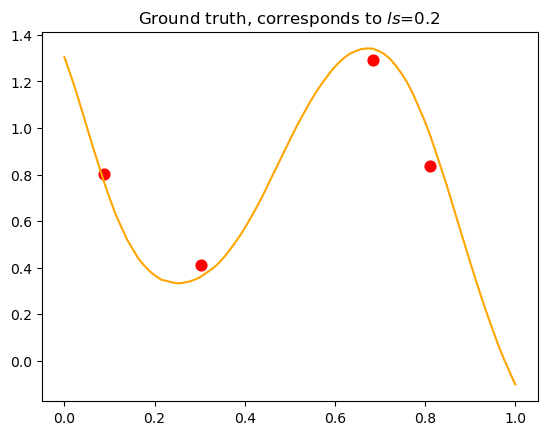

In [4]:
gp_draw = priorcvae_data["gp_draw"]
y_draw = priorcvae_data["y_draw"]
true_ls = priorcvae_data["true_ls"]

# indices of data points
obs_idx = priorcvae_data["obs_idx"]
x = priorcvae_data["x"]
y_obs = y_draw[obs_idx]
x_obs = x[obs_idx]

# plt.figure(figsize=(10, 3))
plt.plot(x, gp_draw, label="ground truth", color="orange")
plt.scatter(x_obs, y_obs, color="red", label="observed data", s=60)
plt.title('Ground truth, corresponds to $ls$=' + str(true_ls))
plt.show()

## Plot Posterior

In [5]:
with open(os.path.join(priorcvae_path, "mcmc_samples.pkl"), "rb") as f:
    mcmc_cvae_samples = pickle.load(f)

with open(os.path.join(priorvae_path, "mcmc_samples.pkl"), "rb") as f:
    mcmc_vae_samples = pickle.load(f)

<Figure size 640x480 with 0 Axes>

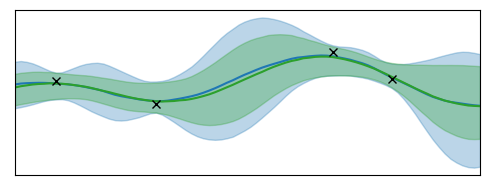

In [8]:
predictions_cvae = mcmc_cvae_samples["f"]
predictions_vae = mcmc_vae_samples["f"]

mean_post_pred_cvae = np.mean(predictions_cvae, axis=0)
# hpdi_post_pred_cvae = hpdi(predictions_cvae, 0.9)
percentiles_cvae = np.percentile(predictions_cvae, [5.0, 95.0], axis=0)

mean_post_pred_vae = np.mean(predictions_vae, axis=0)
# hpdi_post_pred_cvae = hpdi(predictions_cvae, 0.9)
percentiles_vae = np.percentile(predictions_vae, [5.0, 95.0], axis=0)

N_lines = 10

plt.clf()
fig, axs = plt.subplots(1, 1, figsize=(5, 2))

# plt.plot(x, gp_draw, color="tab:blue")

plt.plot(x, mean_post_pred_cvae, color="tab:blue", label="PriorCVAE")
plt.fill_between(x, percentiles_cvae[0, :], percentiles_cvae[1, :], alpha=0.3, interpolate=True, color="tab:blue")

plt.plot(x, mean_post_pred_vae, color="tab:green", label="PriorVAE")
plt.fill_between(x, percentiles_vae[0, :], percentiles_vae[1, :], alpha=0.3, interpolate=True, color="tab:green")

plt.plot(x_obs, y_obs, "x", c="black", zorder=999)

# y_min = min(np.concatenate([y_obs, mean_post_pred_cvae, percentiles_cvae[0, :]]))
# y_max = max(np.concatenate([y_obs, mean_post_pred_cvae, percentiles_cvae[1, :]]))

# plt.ylim([y_min, y_max])
plt.xlim([x[0], x[-1]])
plt.yticks([])
plt.xticks([])
# plt.legend()

plt.tight_layout()

if not os.path.exists(os.path.join(output_path, "MCMC")):
    os.makedirs(os.path.join(output_path, "MCMC"))

output_tik_path = os.path.join(output_path, "MCMC", f"MCMC_posterior.tex")
# tikzplotlib.save(output_tik_path,
#                  figurewidth='\\figurewidth', figureheight='\\figureheight',
#                  tex_relative_path_to_data='fig/',
#                  figure=fig)

plt.show()

In [9]:
print("Average ESS for all PriorCVAE-GP : " + str(round(priorcvae_data["ess"].item())))
print("Average ESS for all PriorVAE-GP : " + str(round(priorvae_data["ess"].item())))

Average ESS for all PriorCVAE-GP : 18246
Average ESS for all PriorVAE-GP : 18897


In [10]:
print("Time for PriorCVAE-GP : " + str(round(priorcvae_data["t_elapsed"].item())))
print("Time for PriorVAE-GP : " + str(round(priorvae_data["t_elapsed"].item())))

Time for PriorCVAE-GP : 100
Time for PriorVAE-GP : 13


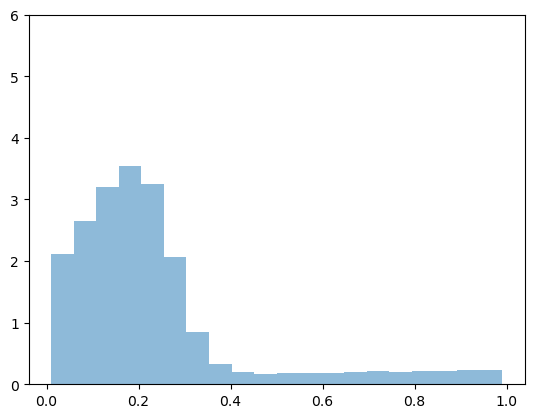

In [11]:
c_samps = mcmc_cvae_samples['c'].reshape((-1,))
plt.hist(c_samps, density=True, label = 'PriorCVAE', bins=20, color='tab:blue', alpha=0.5)

plt.ylim([0, 6])
plt.show()

<Figure size 640x480 with 0 Axes>

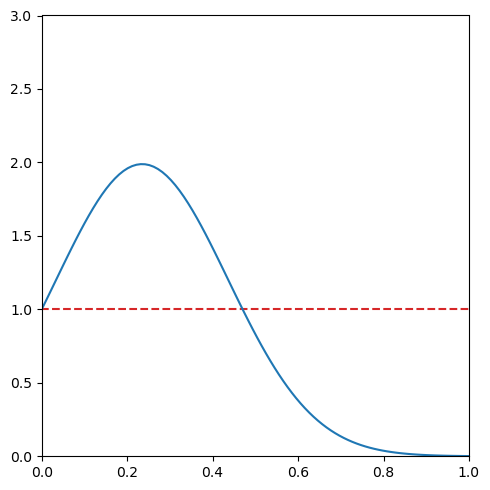

In [14]:
mean = np.mean(c_samps)
sigma = np.std(c_samps)
x_tmp = np.linspace(-0.001, 1, 100)

plt.clf()
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
plt.hlines(1, x_tmp[0], x_tmp[-1], color="tab:red", linestyle="dashed")
plt.plot(x_tmp, scipy.stats.norm.pdf(x_tmp, mean, sigma))

plt.xlim([0, 1])
plt.ylim([0, 3])
# plt.xticks([])
# plt.yticks([])

plt.tight_layout()
output_tik_path = os.path.join(output_path, "MCMC", f"MCMC_lengthscale.tex")
# tikzplotlib.save(output_tik_path,
#                  figurewidth='\\figurewidth', figureheight='\\figureheight',
#                  tex_relative_path_to_data='fig/',
#                  figure=fig)

plt.show()